In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

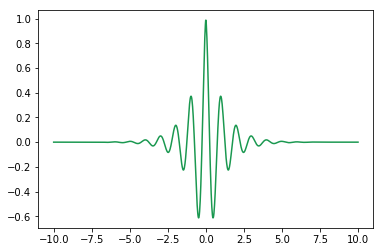

In [3]:
x0 = -10.
x1 = 10.
x = np.linspace(x0, x1, 1000)
def F(x):
    return np.exp(-abs(x)) * np.cos(2 * np.pi * x)
p = plt.plot(x, F(x), color='#1a9850')

In [11]:
import scipy.ndimage


n_space = 101
n_sample = 50
np.random.seed(201)
x = np.linspace(x0, x1, n_space)
X = np.random.random((n_sample, n_space))
y = np.array([scipy.ndimage.convolve(xx, F(x), mode='wrap') for xx in X])

In [15]:
print(X.shape, y.shape)

(50, 101) (50, 101)


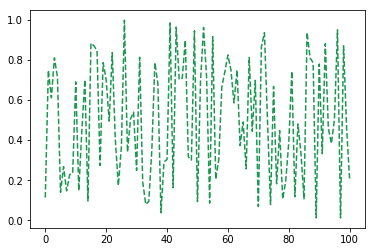

In [20]:
q = plt.plot(X[0,:],'--', color='#1a9850')

In [21]:
from pymks import MKSLocalizationModel
from pymks import PrimitiveBasis

p_basis = PrimitiveBasis(n_states=2, domain=[0, 1])
model = MKSLocalizationModel(basis=p_basis)


In [22]:
model.fit(X, y)

In [24]:
y_pred = model.predict(X)
print(y[0, :4])
print(y_pred[0, :4])

[-0.41059557  0.20004566  0.61200171  0.5878077 ]
[-0.41059557  0.20004566  0.61200171  0.5878077 ]


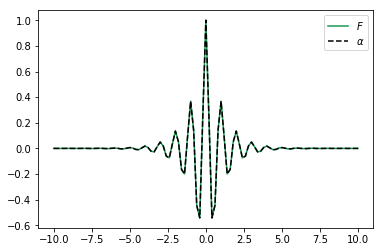

In [29]:
plt.plot(x, F(x), label=r'$F$', color='#1a9850')
plt.plot(x, -model.coef_[:,0] + model.coef_[:, 1],
         'k--', label=r'$\alpha$')
l = plt.legend()